In [1]:
# All imports needed for this workbook
import numpy as np
import pandas as pd
import os
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

## Note: The cells are not necessarily used in sequence, each cell fulfills the goal indicated by its comment

In [2]:
# Checking amount of hours for male/female recordings
df = pd.read_csv(os.getcwd() + '/raw-audio-gender-classification/data/LibriSpeech/SPEAKERS.TXT', skiprows=11, delimiter='|', error_bad_lines=False)
df.columns = [col.strip().replace(';', '').lower() for col in df.columns]
df = df.assign(
    sex=df['sex'].apply(lambda x: x.strip()),
    subset=df['subset'].apply(lambda x: x.strip()),
    minutes=df['minutes'],
    name=df['name'].apply(lambda x: x.strip()),
)
print(df.loc[(df['subset'] == 'train-clean-100') & (df['sex'] == "M")]['minutes'].sum()/60)
print(df.loc[(df['subset'] == 'train-clean-100') & (df['sex'] == "F")]['minutes'].sum()/60)

50.203833333333336
50.38633333333334


In [3]:
# Tranform data into csv to input in Tableau for visualisation
df = pd.read_csv(os.getcwd() + '/raw-audio-gender-classification/data/LibriSpeech/SPEAKERS.TXT', skiprows=11, delimiter='|', error_bad_lines=False)
df.columns = [col.strip().replace(';', '').lower() for col in df.columns]
df = df.assign(
    sex=df['sex'].apply(lambda x: x.strip()),
    subset=df['subset'].apply(lambda x: x.strip()),
    minutes=df['minutes'],
    name=df['name'].apply(lambda x: x.strip()),
)
df = df.loc[df['subset'] == 'train-clean-100']
df.to_csv('speakers.csv', index=False)

Text(0.5, 0, 'Time [sec]')

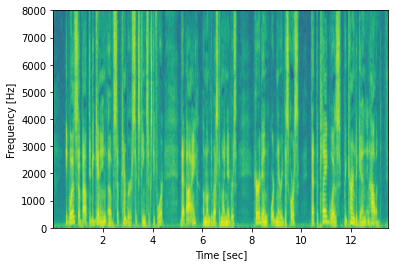

In [4]:
# Create simple spectogram to visualise an example from the openSLR dataset
filename = '/Users/hajarat/Developer/Folders/LibriSpeech/train-clean-100/26/495/26-495-0001.flac'
data, samplerate = sf.read(filename)
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

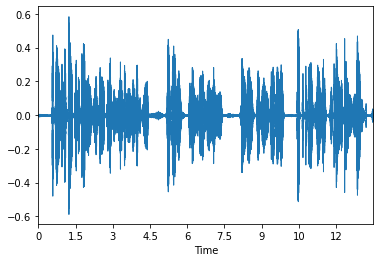

In [5]:
# Display amplitude-time domain for an example from the openSLR dataset
filename = '/Users/hajarat/Developer/Folders/LibriSpeech/train-clean-100/26/495/26-495-0001.flac'
data, sample_rate1 = librosa.load(filename, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')
librosa.display.waveplot(data,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)